In [25]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from ast import literal_eval



In [26]:
# Forward 600 
# I don't have the history of the loss 

forward_600_adam_beam = pd.read_csv('forward_60_beam_inf.csv', converters = {"gen_summary": literal_eval})
forward_600_adam_greedy = pd.read_csv('forward_600_inf_decode.csv', converters = {"gen_summary": literal_eval})

In [29]:
type(forward_600_adam_beam['gen_summary'][0])

list

In [30]:
# rmsprop forward 
# from notebook forwards_inf notebook, loss for rmsprop generally does continue going down 

# General notes from looking at our model run logs (https://docs.google.com/spreadsheets/d/1iZgiEHaOLM195GCsnep5PpaZMOKRONvqnmuYVHHMZ6Q/edit#gid=271452635)
# 1. rmsprop did not necessarily give much of an improvement in rouge scores, 
# however given loss function, it's possible that we could have gotten an improved model with more epochs 

# 2. overall, it looks like beam search almost always give higher precision but lower recall than greedy 

#rms_forward_greedy = pd.read_csv('')
# I had forgotten to download the weights and could not rerun for the decoding sequences...

rms_forward_beam = pd.read_csv('testset_decoded_beam_exp7.csv', converters = {"gen_summary": literal_eval})

In [31]:
# rmwprop backward 
# from notebook backwards_inf notebook, loss for rmsprop generally does continue going down 
rms_backward_greedy = pd.read_csv('testset_decodedseq_exp8.csv', converters = {"gen_summary": literal_eval})
rms_backward_beam = pd.read_csv('beam_exp8.csv', converters = {'gen_summary': literal_eval})

In [32]:
# Comparison of lengths of outputs for beam vs. greedy 

sub1 = pd.DataFrame([pd.Series(forward_600_adam_beam['gen_summary'].apply(lambda x: len(x))),pd.Series(['beam']*len(forward_600_adam_beam))]).T
sub1.columns = ['gen_summary_len','type'] 

sub2 = pd.DataFrame([pd.Series(forward_600_adam_greedy['gen_summary'].apply(lambda x: len(x))),pd.Series(['greedy']*len(forward_600_adam_greedy))]).T
sub2.columns = ['gen_summary_len','type'] 

len_gen_summary = pd.concat([sub1,sub2], axis=0).reset_index(drop=True)
len_gen_summary['gen_summary_len']=len_gen_summary['gen_summary_len'].astype(float)

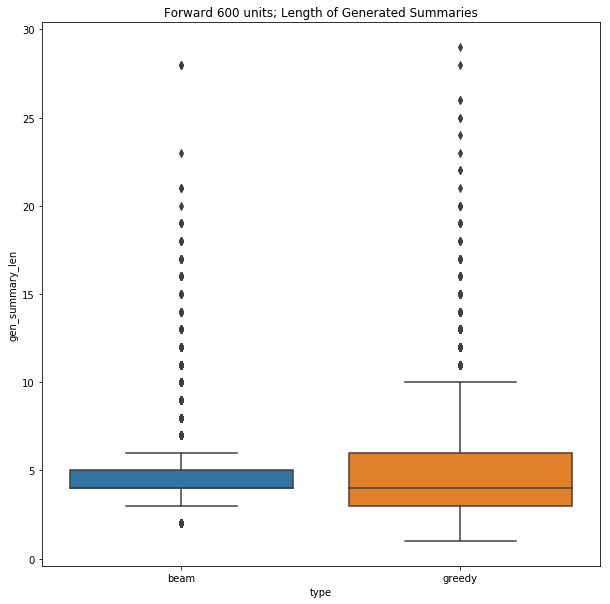

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x='type', y='gen_summary_len', data=len_gen_summary, ax=ax).set_title('Forward 600 units; Length of Generated Summaries')
plt.show()
# not much of a significant difference between lengths 
# although it looks like greedy search tends to have a larger range of lengths in the generated summaries

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


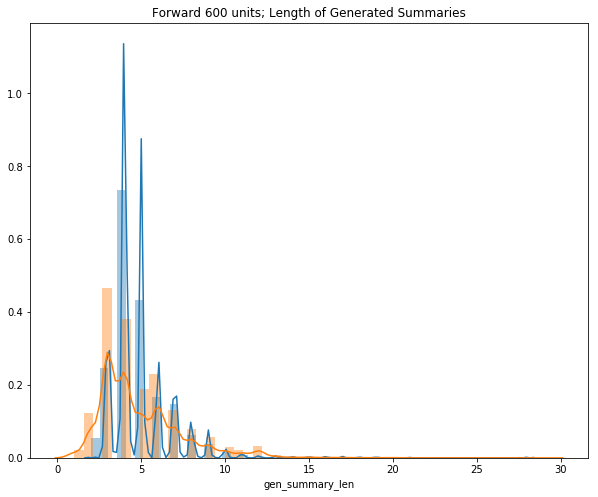

In [43]:
fig, ax = plt.subplots(figsize = (10,8))

sns.distplot(len_gen_summary[len_gen_summary['type']=='beam']['gen_summary_len'], ax=ax)
sns.distplot(len_gen_summary[len_gen_summary['type']=='greedy']['gen_summary_len'],ax=ax).set_title('Forward 600 units; Length of Generated Summaries')
plt.show()

In [44]:
# let's see this with backward 


sub2 = pd.DataFrame([pd.Series(rms_backward_greedy['gen_summary'].apply(lambda x: len(x))),pd.Series(['greedy']*len(rms_backward_greedy))]).T
sub2.columns = ['gen_summary_len','type'] 

sub1 = pd.DataFrame([pd.Series(rms_backward_beam['gen_summary'].apply(lambda x: len(x))),pd.Series(['beam']*len(rms_backward_beam))]).T
sub1.columns = ['gen_summary_len','type'] 

len_gen_summary = pd.concat([sub1,sub2], axis=0).reset_index(drop=True)
len_gen_summary['gen_summary_len']=len_gen_summary['gen_summary_len'].astype(float)

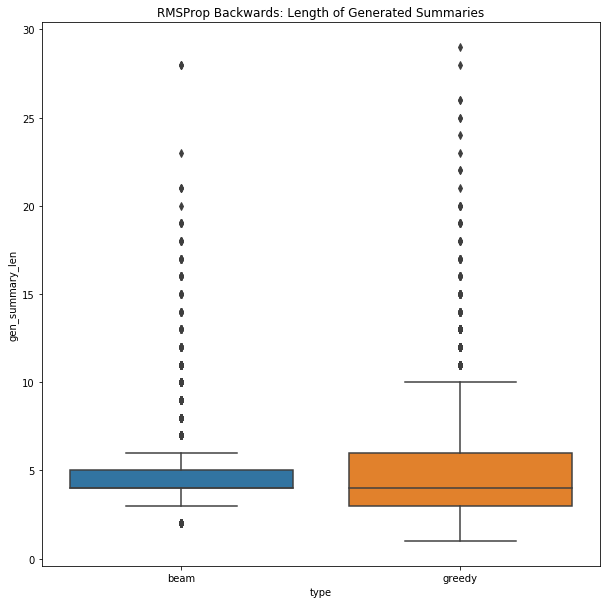

In [45]:

fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x='type', y='gen_summary_len', data=len_gen_summary, ax=ax).set_title('RMSProp Backwards: Length of Generated Summaries')
plt.show()

In [46]:
# Let's take a look at some of the summaries 

import pickle 

from sklearn.model_selection import train_test_split


In [47]:
clean_data = pickle.load( open("/Users/vlu/Desktop/cleandata.pkl", "rb" ) )

In [48]:
x_data = clean_data['text'] 
y_data = clean_data['headline']

In [49]:
x_train, x_test_temp, y_train, y_test_temp = train_test_split(x_data, y_data, 
                                                            test_size=0.3, random_state=0) 
x_dev, x_test, y_dev, y_test = train_test_split(x_test_temp, y_test_temp, 
                                                            test_size=0.33, random_state=0) 

In [50]:
# create index for easy reference 
x_test_series = x_test.reset_index(drop=True)
y_test_series = y_test.reset_index(drop=True)

In [67]:
# take a look at some of the samples 
for i in range(4000,4050): 
    print('==============='+str(i)+'===================')
    print('======================================')
    print('--Original text: '+' '.join(x_test_series[i]))
    print('--Original summary: '+' '.join(y_test_series[i]))
    print('---------------------------------------')
    print('>>Forwards, hidden 600, adam and BEAM<<: '+' '.join(forward_600_adam_beam['gen_summary'][i]))
    print('>>Forwards, hidden 600, adam and GREEDY<<: '+' '.join(forward_600_adam_greedy['gen_summary'][i]))
    print('>>Forwards, rmsprop and BEAM<<: '+' '.join(rms_forward_beam['gen_summary'][i]))
    print('>>Backwards, rmsprop and BEAM<<: '+' '.join(rms_backward_beam['gen_summary'][i]))
    print('>>Backwards: rmsprop and GREEDY<<: '+' '.join(rms_backward_greedy['gen_summary'][i]))

===============4000===================
--Original text: your legs will hold you in the saddle , and give your horse cues .
--Original summary: keep your legs handing close to your horse s side , without gripping at the knee .
---------------------------------------
>>Forwards, hidden 600, adam and BEAM<<: when you are done with the saddle , squeeze the saddle off .
>>Forwards, hidden 600, adam and GREEDY<<: sit in a saddle or a flat surface
>>Forwards, rmsprop and BEAM<<: keep your legs relaxed .
>>Backwards, rmsprop and BEAM<<: relax your horse .
>>Backwards: rmsprop and GREEDY<<: keep your horse s tail straight up to the front
===============4001===================
--Original text: the cut will be cleaner if you do not force the tile into the blade .
--Original summary: turn on the saw and let the blade do the work cutting the tile .
---------------------------------------
>>Forwards, hidden 600, adam and BEAM<<: cut the tile .
>>Forwards, hidden 600, adam and GREEDY<<: cut the tile 

## Observations: 

* longer text (i.e. batch 4003, 4008): generated summaries tend to be a bit like gibberish or too short to give any real meaning. This is perhaps due to the fact that texts were cut to be < 100 words. However, if the text was well written (i.e. batch 4027; "well-written" is definitely subjective here), results are still quite legible and understandable to the human brain. 
* medium text (i.e. batch 4004, 4005, 4006, 4007, 4013, 4033, 4034,4040): summaries may not reflect original summary, but do provide good representation from a human point of view. 
* forward with hidden 600 obviously had more parameters to learn, but learned fairly impressive results (i.e. batch 4011, 4012, 4017). 
* It would seem that the original text themselves must also provide enough length for the encoder-decoder to learn anything meaningful and spit out a summary (i.e. batch 4016, 4025).
* Batch 4045 shows a test summary with just 1 word. This is something that we should have looked through and caught when cleaning the dataset. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


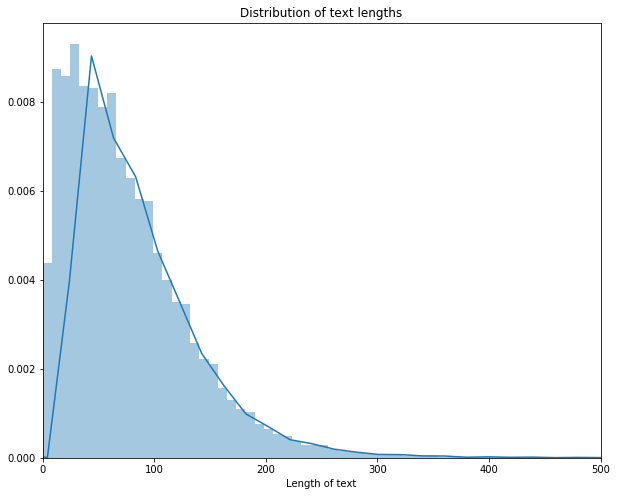

In [87]:
# how are the scores split between lengths of summaries? 

# what is the general distribution of the text data (provided text)? 
len_text = []
for i in range(0,len(x_test_series)): 
    len_text.append(len(x_test_series[i]))
    
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(len_text, ax=ax, bins=300).set_title('Distribution of text lengths')
plt.xlabel('Length of text')
plt.xlim([0,500])
plt.show()

In [109]:
# observe how rouge scores fluctuate based on text length provided 
# let's do some buckets: < 50 words, 50 - 100 words, > 100 words 


# worth noting here that this is based on the cleaned up text; we would have to run the encoder 
# to get the actual encoded text (which would be less than 100 words) 

lthan50 = [] 
bt50and100 = [] 
gthan100 = [] 
for i in range(0, len(len_text)): 
    if len_text[i]<=50: 
        lthan50.append(i)
    elif len_text[i]>50 and len_text[i]<=100: 
        bt50and100.append(i)
    else: 
        gthan100.append(i)

def getscore(index_holder,df): 
    r = np.nanmean(df[df.index.isin(index_holder)]['recall'])
    p = np.nanmean(df[df.index.isin(index_holder)]['precision'])
    f = np.nanmean(df[df.index.isin(index_holder)]['f1score'])
    return(r,p,f)

lthan50_all = []
lthan50_all.append(getscore(lthan50, forward_600_adam_beam))
lthan50_all.append(getscore(lthan50, forward_600_adam_greedy))
lthan50_all.append(getscore(lthan50, rms_forward_beam))
lthan50_all.append(getscore(lthan50, rms_backward_beam))
lthan50_all.append(getscore(lthan50, rms_backward_greedy))

lthan50_all_df = pd.DataFrame(lthan50_all)
lthan50_all_df.columns = ['recall','precision','f1score']
lthan50_all_df.index = ['f_adam_beam','f_adam_greedy','rms_forward_beam','rms_backward_beam','rms_backward_greedy']

bt50and100_all = []
bt50and100_all.append(getscore(bt50and100, forward_600_adam_beam))
bt50and100_all.append(getscore(bt50and100, forward_600_adam_greedy))
bt50and100_all.append(getscore(bt50and100, rms_forward_beam))
bt50and100_all.append(getscore(bt50and100, rms_backward_beam))
bt50and100_all.append(getscore(bt50and100, rms_backward_greedy))

bt50and100_all_df = pd.DataFrame(bt50and100_all)
bt50and100_all_df.columns = ['recall','precision','f1score']
bt50and100_all_df.index = ['f_adam_beam','f_adam_greedy','rms_forward_beam','rms_backward_beam','rms_backward_greedy']

gthan100_all = []
gthan100_all.append(getscore(gthan100, forward_600_adam_beam))
gthan100_all.append(getscore(gthan100, forward_600_adam_greedy))
gthan100_all.append(getscore(gthan100, rms_forward_beam))
gthan100_all.append(getscore(gthan100, rms_backward_beam))
gthan100_all.append(getscore(gthan100, rms_backward_greedy))

gthan100_all_df = pd.DataFrame(gthan100_all)
gthan100_all_df.columns = ['recall','precision','f1score']
gthan100_all_df.index = ['f_adam_beam','f_adam_greedy','rms_forward_beam','rms_backward_beam','rms_backward_greedy']

In [110]:
lthan50_all_df

,recall,precision,f1score
f_adam_beam,0.188621,0.231249,0.190249
f_adam_greedy,0.209822,0.280921,0.218318
rms_forward_beam,0.180389,0.223579,0.182962
rms_backward_beam,0.165148,0.212025,0.169681
rms_backward_greedy,0.190864,0.261933,0.200772


In [111]:
bt50and100_all_df
# Notice how rms_backward_beam vs. rms_backward_greedy do not differ much based on the text length 
# (especially lthan50 or bt50and100). 

# Overall in general, it seems like all experiments do almost roughly the same as long as the original text 
# was not too long. 

# It does look like the forward_600_adam_greedy, however, did the best in texts between 50 and 100 words long. 

,recall,precision,f1score
f_adam_beam,0.201386,0.233191,0.202078
f_adam_greedy,0.220962,0.285060,0.231243
rms_forward_beam,0.199807,0.228884,0.199320
rms_backward_beam,0.166494,0.205024,0.171980
rms_backward_greedy,0.192822,0.263672,0.206771


In [112]:
gthan100_all_df
# Notice how across the board, if the original text provided was greater than 100, 
# we see a decrease in all metrics for all of our experiments 

,recall,precision,f1score
f_adam_beam,0.161829,0.182121,0.161472
f_adam_greedy,0.170681,0.220156,0.179021
rms_forward_beam,0.153154,0.171064,0.151206
rms_backward_beam,0.141993,0.165322,0.143575
rms_backward_greedy,0.157686,0.209627,0.167381
